<a href="https://colab.research.google.com/github/rdemarqui/studies/blob/master/Audio_transcr_summ_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Attendance transcription, summarization and classification

**Business problem:** Transcribe customer service audio.

https://www.youtube.com/watch?v=Xk9BSAAK0q8

In [ ]:
from IPython.display import YouTubeVideo

atendimento = YouTubeVideo('Xk9BSAAK0q8')
display(atendimento)

## Obtaining audio

In [ ]:
!pip install -q pytube

In [ ]:
from pytube import YouTube

def Download(link):
    youtubeLink = YouTube(link)
    youtubeObject = youtubeLink.streams.filter(only_audio=True).first()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")

link = input("Enter the YouTube video URL: ")
Download(link)

## Transcribing the attendance

For this we will use the Whisper package, provided by OpenAI.

Documentation: https://github.com/openai/whisper

In [ ]:
!pip install -q cohere tiktoken
!pip install -q git+https://github.com/openai/whisper.git

In [ ]:
import whisper
import time

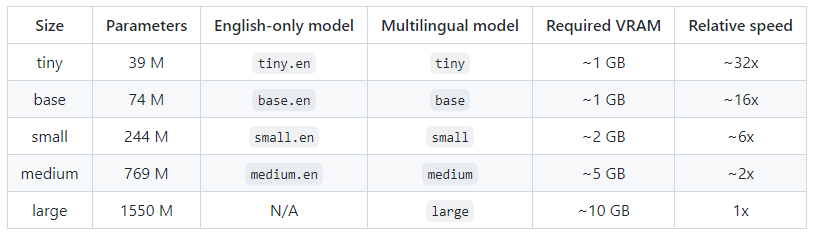

In [ ]:
# Loading trained model
model = whisper.load_model("large-v2")

In [ ]:
# Running transcription
start_time = time.time()

result = model.transcribe("ATENDIMENTO.mp4")

end_time = time.time()
execution_time = end_time - start_time
hours, remainder = divmod(int(execution_time), 3600)
minutes, seconds = divmod(remainder, 60)
print(f"\nExecution time: {hours:02d}:{minutes:02d}:{seconds:02d}")

In [ ]:
# Checking the liguage detected by the model
result['language']

In [ ]:
# Printing transcription
full_transcr = ''
for segment in result['segments']:
  timestamp = time.strftime('%H:%M:%S', time.gmtime(segment['start']))
  full_transcr += full_transcr + '\n' + segment['text']
  print(timestamp, segment['text'])


In [ ]:
full_transcr



---



---

